Game, Set, Match!”

No three words are sweeter to hear as a tennis player than those, which indicate that a player has beaten their opponent. While you can head down to your nearest court and aim to overcome your challenger across the net without much practice, a league of professionals spends day and night, month after month practicing to be among the best in the world. Today you will put your linear regression knowledge to the test to better understand what it takes to be an all-star tennis player.

Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. Load the csv into a DataFrame and investigate it to gain familiarity with the data.

Open the hint for more information about each column of the dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("tennis_stats.csv")
display(df.head(5))

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


# Tennis Statistics Data 
-----------------------------------------------------
## Shape

* Source = CSV file
* Rows = 1721
* Columns = 24

## Identifying Data Columns
* **Player** - name of the tennis player *(dtype = object, nunique = 438) *
* **Year** - year data was recorded *(dtype = int64, range = 2009-2017)*

## Service Game Columns (Offensive)

* **Aces** - number of serves by the player where the receiver does not touch the ball *(dtype = int64, range = )*
* **DoubleFaults** - number of times player missed both first and second serve attempts *(dtype = int64, range = )*
* **FirstServe** - % of first-serve attempts made *(dtype = float64, range = )*
* **FirstServePointsWon** - % of first-serve attempt points won by the player *(dtype = float64, range = )*
* **SecondServePointsWon** - % of second-serve attempt points won by the player *(dtype = float64, range = )*
* **BreakPointsFaced** - number of times where the receiver could have won service game of the player *(dtype = int64, range = )*
* **BreakPointsSaved** - % of the time the player was able to stop the receiver from winning service game when they had the chance *(dtype = float64, range = )*
* **ServiceGamesPlayed** - total number of games where the player served *(dtype = int64, range = )*
* **ServiceGamesWon** - total number of games where the player served and won *(dtype = float64, range = )*
* **TotalServicePointsWon** - % of points in games where the player served that they won *(dtype = float64, range = )*

## Return Game Columns (Defensive)

* **FirstServeReturnPointsWon** - % of opponents first-serve points the player was able to win (dtype = float64, range = )*
* **SecondServeReturnPointsWon** - % of opponents second-serve points the player was able to win (dtype = float64, range = )*
* **BreakPointsOpportunities** - number of times where the player could have won the service game of the opponent *(dtype = int64, range = )*
* **BreakPointsConverted** - % of the time the player was able to win their opponent’s service game when they had the chance (dtype = float64, range = )*
* **ReturnGamesPlayed** - total number of games where the player’s opponent served *(dtype = int64, range = )*
* **ReturnGamesWon** - total number of games where the player’s opponent served and the player won *(dtype = int64, range = )*
* **ReturnPointsWon** - total number of points where the player’s opponent served and the player won *(dtype = int64, range = )*
* **TotalPointsWon** - % of points won by the player (dtype = float64, range = )*

## Outcomes Columns

* **Wins** - number of matches won in a year *(dtype = int64, range = )*
* **Losses** - number of matches lost in a year *(dtype = int64, range = )*
* **Winnings** - total winnings in USD($) in a year *(dtype = int64, range = 108 - 1074562)*
* **Ranking** - ranking at the end of year *(dtype = int64, range = 3 - 1443)*


## Question 3
Perform exploratory analysis on the data by plotting different features against the different outcomes. What relationships do you find between the features and outcomes? Do any of the features seem to predict the outcomes?

Observations in data:
    * Ranking doesn't seem to change for players from year to year
        * Not a outcome variable to relate offensive/defensive stats
        * Left with Winnings, Wins and Losses
            * Winnings selected as first outcome variable to relate offensive/defensive stats
                * Winnings may be a better judge of competition as losses in more competitive tournaments is better than winning in uncompetitive tournaments (Not proven with current data)
                * Data showed alot of noise in low winnings players, using players above the mean winnings and 2 standard deviations to isolate signification offensive/defensive stats
                
      

,Feature,Outcome,Correlation
0,ServiceGamesPlayed,TotalMatchesPlayed,0.961
1,ReturnGamesPlayed,TotalMatchesPlayed,0.961
2,BreakPointsOpportunities,TotalMatchesPlayed,0.946
3,BreakPointsFaced,Losses,0.943
4,BreakPointsFaced,TotalMatchesPlayed,0.940
5,ReturnGamesPlayed,Losses,0.937
6,ServiceGamesPlayed,Losses,0.935
7,ServiceGamesPlayed,Wins,0.929
8,ReturnGamesPlayed,Wins,0.928
9,BreakPointsOpportunities,Wins,0.923


,Feature,WinCorrelation,LossCorrelation,WinLossCorrDiff
26,ReturnPointsPerMatch,-0.577,-0.656,0.079
25,ServiceGamesWonPerMatch,-0.572,-0.649,0.077
24,ReturnGamesWonPerMatch,-0.435,-0.499,0.064
5,Aces,0.825,0.769,0.056
6,TotalPointsWon,0.459,0.429,0.030
10,ReturnGamesWon,0.293,0.263,0.030
7,TotalServicePointsWon,0.399,0.371,0.028
9,FirstServePointsWon,0.357,0.331,0.026
8,ServiceGamesWon,0.385,0.367,0.018
12,SecondServePointsWon,0.269,0.251,0.018


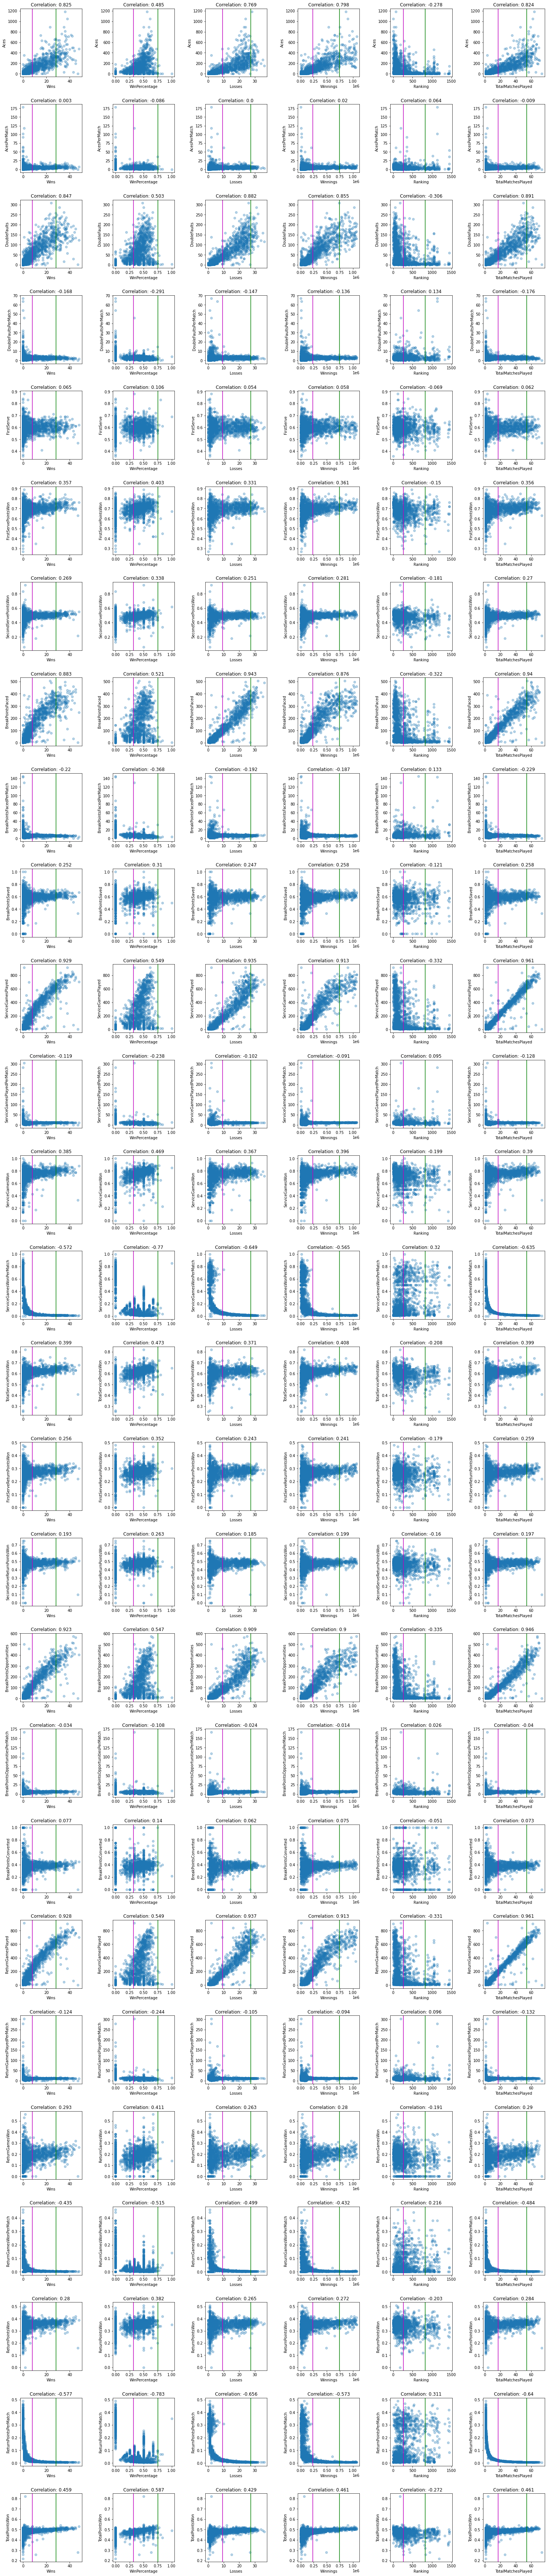

In [33]:
df["TotalMatchesPlayed"] = df.apply(lambda x: 1 if (x.Wins == 0 & x.Losses == 0) else (x.Wins + x.Losses), axis=1)
df["WinPercentage"] = df.Wins / df.TotalMatchesPlayed
df["AcesPerMatch"] = df.Aces / df.TotalMatchesPlayed
df["DoubleFaultsPerMatch"] = df.DoubleFaults / df.TotalMatchesPlayed
df["BreakPointsFacedPerMatch"] = df.BreakPointsFaced / df.TotalMatchesPlayed
df["ServiceGamesPlayedPerMatch"] = df.ServiceGamesPlayed / df.TotalMatchesPlayed
df["ServiceGamesWonPerMatch"] = df.ServiceGamesWon / df.TotalMatchesPlayed
df["BreakPointsOpportunitiesPerMatch"] = df.BreakPointsOpportunities / df.TotalMatchesPlayed
df["ReturnGamesPlayedPerMatch"] = df.ReturnGamesPlayed / df.TotalMatchesPlayed
df["ReturnGamesWonPerMatch"] = df.ReturnGamesWon / df.TotalMatchesPlayed
df["ReturnPointsPerMatch"] = df.ReturnPointsWon / df.TotalMatchesPlayed

offensive = ['Aces',
             'AcesPerMatch',
             'DoubleFaults',
             'DoubleFaultsPerMatch',
             'FirstServe',
             'FirstServePointsWon',
             'SecondServePointsWon',
             'BreakPointsFaced',
             'BreakPointsFacedPerMatch',
             'BreakPointsSaved',
             'ServiceGamesPlayed',
             'ServiceGamesPlayedPerMatch',
             'ServiceGamesWon',
             'ServiceGamesWonPerMatch',
             'TotalServicePointsWon']
defensive = ['FirstServeReturnPointsWon',
             'SecondServeReturnPointsWon',
             'BreakPointsOpportunities',
             'BreakPointsOpportunitiesPerMatch',
             'BreakPointsConverted',
             'ReturnGamesPlayed',
             'ReturnGamesPlayedPerMatch',
             'ReturnGamesWon',
             'ReturnGamesWonPerMatch',
             'ReturnPointsWon',
             'ReturnPointsPerMatch',
             'TotalPointsWon']
features = offensive + defensive
outcomes = ['Wins',
            'WinPercentage',
            'Losses',
            'Winnings',
            'Ranking',
            'TotalMatchesPlayed']
corr_lst = []
plt.figure(figsize=(25, 125))
plt.subplots_adjust(wspace=0.5, hspace=0.4)
for i in range(len(features)):
    for j in range(len(outcomes)):
        plt.subplot(len(features), len(outcomes), 1+i*len(outcomes)+j)
        plt.scatter(df[outcomes[j]], df[features[i]], alpha=0.33)
        plt.axvline(df[outcomes[j]].mean(), color="m")
        plt.axvline(df[outcomes[j]].mean()+(2*df[outcomes[j]].std()), color="g")
        plt.xlabel(outcomes[j])
        plt.ylabel(features[i])
        plt.title(f'Correlation: {round(df[features[i]].corr(df[outcomes[j]]), 3)}')
        corr_lst.append([features[i],outcomes[j],round(df[features[i]].corr(df[outcomes[j]]), 3)])

df_corr = pd.DataFrame(corr_lst, columns=["Feature", "Outcome", 'Correlation']).sort_values("Correlation", ascending=False).reset_index(drop=True)
df_corr_wins = df_corr.loc[df_corr['Outcome'] == 'Wins', ["Feature",'Correlation']]
df_corr_wins.rename(columns={'Correlation': 'WinCorrelation'},inplace=True)
df_corr_losses = df_corr.loc[df_corr['Outcome'] == 'Losses', ["Feature",'Correlation']]
df_corr_losses.rename(columns={'Correlation': 'LossCorrelation'},inplace=True)
df_winloss = pd.merge(df_corr_wins, df_corr_losses, on="Feature", how="left")
df_winloss["WinLossCorrDiff"] = df_winloss.WinCorrelation - df_winloss.LossCorrelation
df_winloss.sort_values("WinLossCorrDiff", ascending=False, inplace = True)
display(df_corr.head(10), df_winloss)

df["TotalMatchesPlayed"] = df.Wins + df.Losses
df["EarningWinningRatio"] = df.apply(lambda x: x.Winnings if x.TotalMatchesPlayed > 0 else 0, axis=1)

plt.show()

[[1837.6781452]]
Train Score: 0.8039881582234096
Test Score: 0.8376940254441734


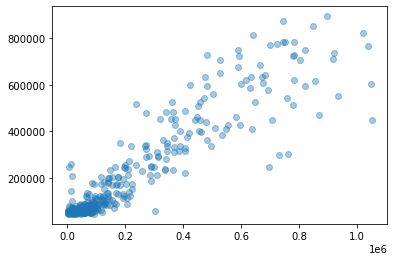

In [55]:
(x_train, x_test, y_train, y_test) = train_test_split(df[['BreakPointsOpportunities']], df[['Winnings']], train_size=0.8, test_size=0.2, random_state=150)
nlr = LinearRegression()
data = nlr.fit(x_train,y_train)
y_predict = nlr.predict(x_test)
print(data.coef_)
print("Train Score:", nlr.score(x_train,y_train))
print("Test Score:", nlr.score(x_test,y_test))

plt.scatter(y_test,y_predict, alpha=0.4)
plt.show()


[[ 1055.1635202  -4202.38014427]]
Train Score: 0.8410322611892005
Test Score: 0.8544738853773479


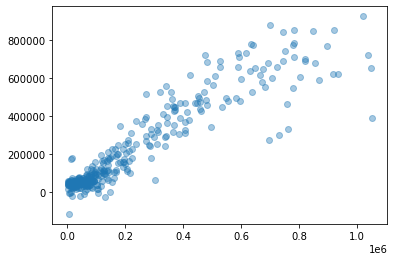

In [54]:
(x_train, x_test, y_train, y_test) = train_test_split(df[['ReturnGamesPlayed','BreakPointsOpportunitiesPerMatch']], df[['Winnings']], train_size=0.8, test_size=0.2, random_state=150)
nlr = LinearRegression()
data = nlr.fit(x_train,y_train)
y_predict = nlr.predict(x_test)
print(data.coef_)
print("Train Score:", nlr.score(x_train,y_train))
print("Test Score:", nlr.score(x_test,y_test))

plt.scatter(y_test,y_predict, alpha=0.4)
plt.show()